# Introduction

The miniSASP module is probably one of the more confuse modules and needs to be reorganized. Its goal is to read and process miniSASP data. This includes the convertion to optical depth and aerosol optical depth (correction for the airmass factor and rayleigh scattering).
There is also a function to simulate the sky brightness (as seen by the miniSASP) from a aerosol sizedistribution. This data has not been well tested though.

# Imports

In [20]:
from atmPy.instruments.miniSASP import miniSASP
from atmPy.tools import plt_tools
from atmPy.instruments.piccolo import piccolo
%matplotlib inline
plt_tools.setRcParams(plt)

# Load a raw miniSASP file

In [9]:
ms_raw = miniSASP.read_csv('./data/miniSASP_raw.txt')

/Users/htelg/prog/atm-py/atmPy/instruments/miniSASP/miniSASP.py:716: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric='force')


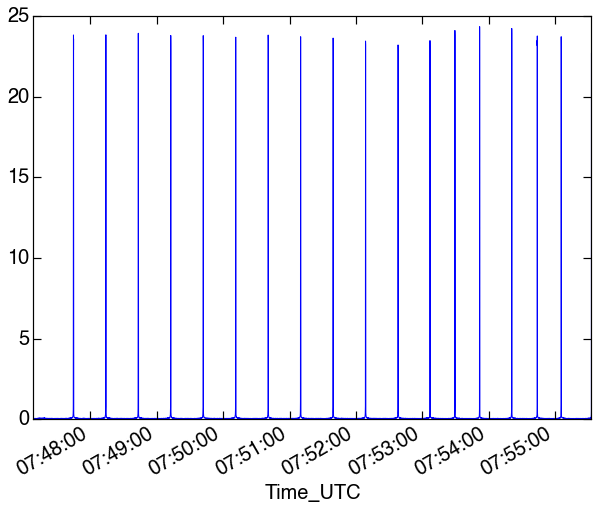

In [45]:
ms_raw.data.PhotoAsh.plot()

# Get sun_intensities

here we get the maxima of the peaks from above

In [40]:
sun_intensities = ms_raw.find_peaks()

(15, 30)

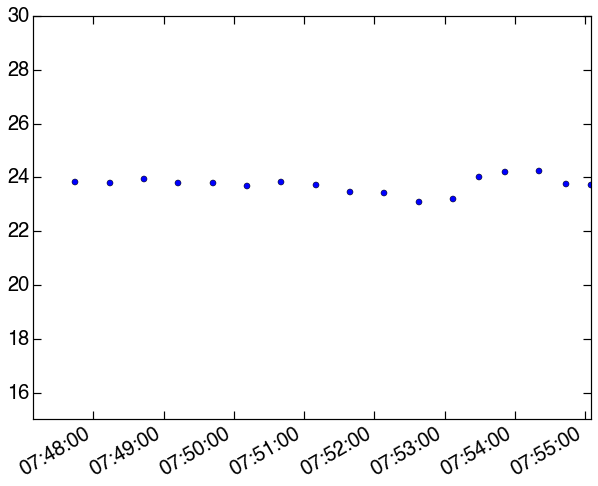

In [48]:
ax = sun_intensities.data['550.4'].plot(marker = 'o', linestyle = '')
ax.set_ylim((15,30))

# Plot as a function of Altitude

sun_intensities does not have Altitude information, which we can get from telemetry data, here from the piccolo auto pilot.

In [49]:
picco = piccolo.read_csv('./data/piccolo.log')
sun_intensities = sun_intensities.add_sun_elevetion(picco)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/lines.py:1083: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


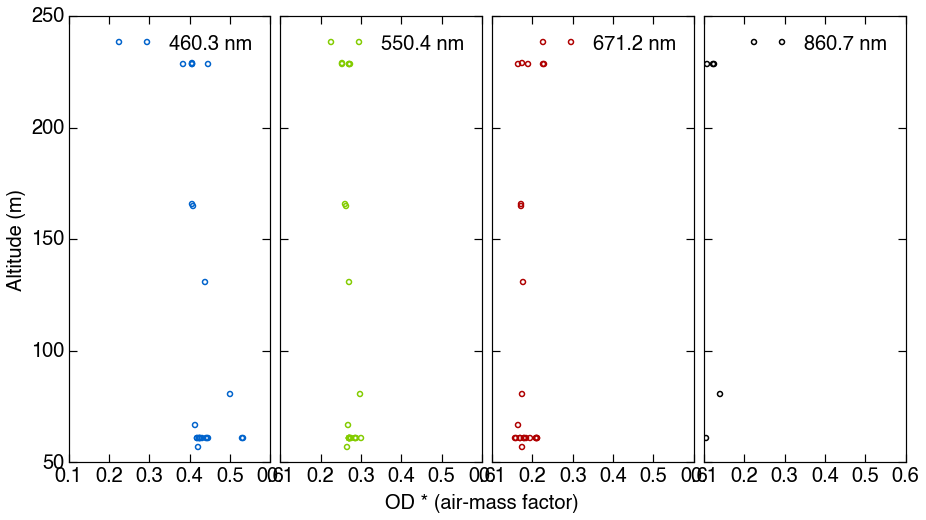

In [56]:
axs = sun_intensities.plot(offset=[3.29,3.44,3.99,4.16],
                    airmassfct=True,
                    move_max = False)
for ax in axs:
    ax.set_xlim((0.1,0.6))